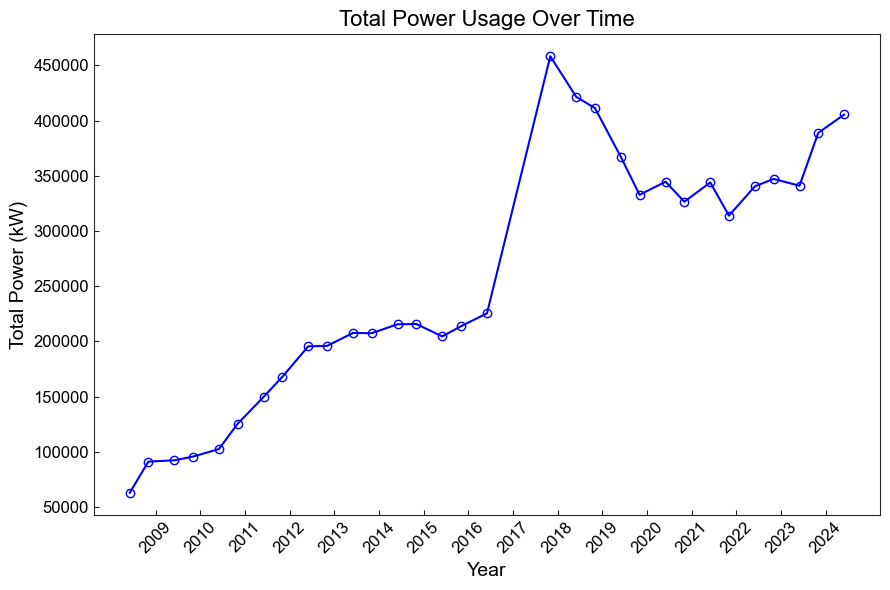

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Plot the data with unfilled circles as markers
plt.figure(figsize=(9, 6))
plt.plot(dates, total_power_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')
plt.title('Total Power Usage Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPower.png')
plt.show()


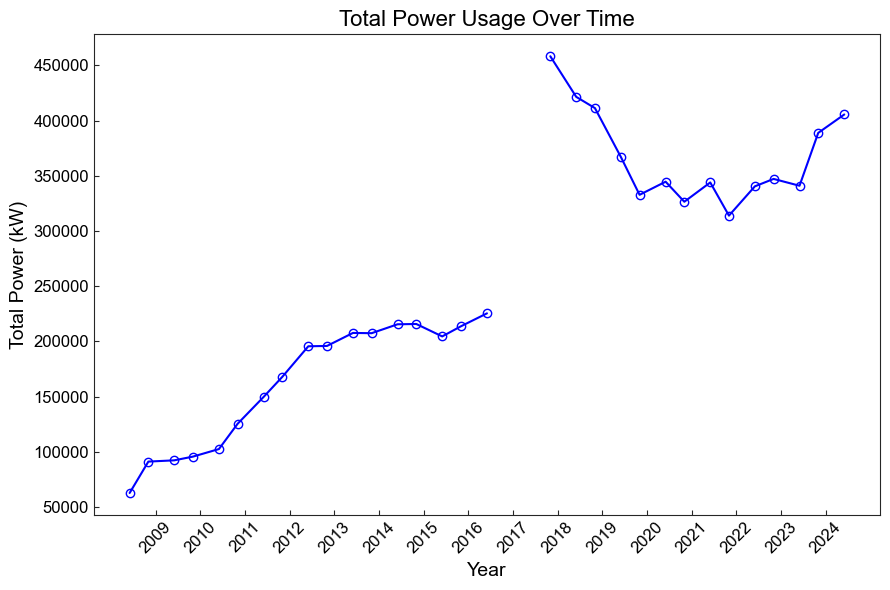

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Split data into two segments: before and after the gap
# Assuming the gap is between June 2016 and November 2017
first_segment_dates = dates[dates < '2016-07']
first_segment_values = total_power_values[:len(first_segment_dates)]

second_segment_dates = dates[dates > '2017-06']
second_segment_values = total_power_values[len(first_segment_dates):]

# Plot the data with unfilled circles as markers
plt.figure(figsize=(9, 6))

# Plot first segment (before gap)
plt.plot(first_segment_dates, first_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Plot second segment (after gap)
plt.plot(second_segment_dates, second_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Formatting the plot
plt.title('Total Power Usage Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPowerGAP.png')
plt.show()


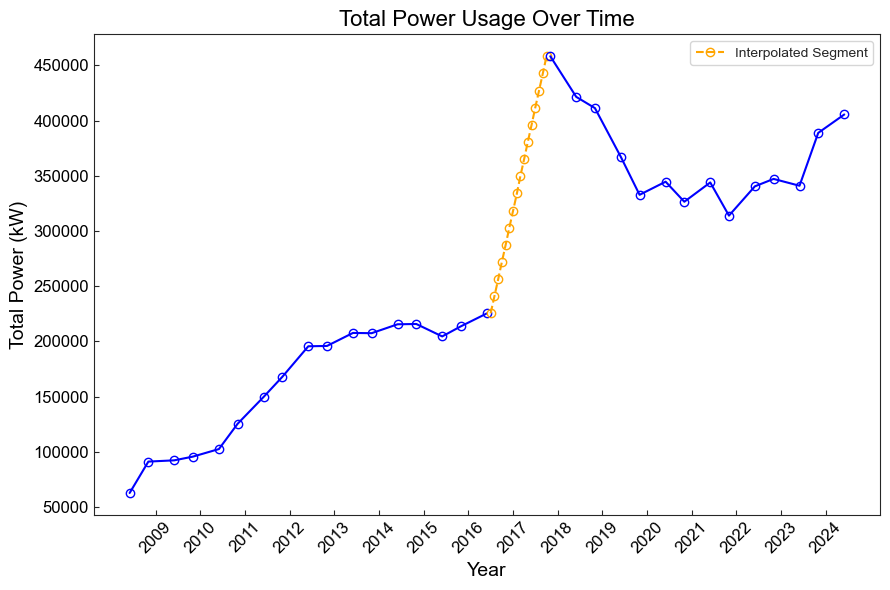

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Split data into two segments: before and after the gap
first_segment_dates = dates[dates < '2016-07']
first_segment_values = total_power_values[:len(first_segment_dates)]

second_segment_dates = dates[dates > '2017-06']
second_segment_values = total_power_values[len(first_segment_dates):]

# Perform linear interpolation
date_before_gap = pd.to_datetime('2016-06')
date_after_gap = pd.to_datetime('2017-11')

# Values for interpolation
value_before_gap = first_segment_values[-1]
value_after_gap = second_segment_values[0]

# Interpolate values for each month between June 2016 and November 2017
interpolated_dates = pd.date_range(start=date_before_gap, end=date_after_gap, freq='MS')[1:-1]
interpolated_values = np.linspace(value_before_gap, value_after_gap, len(interpolated_dates))

# Plot the data with unfilled circles as markers
plt.figure(figsize=(9, 6))

# Plot first segment (before gap)
plt.plot(first_segment_dates, first_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Plot interpolated segment in a different color
plt.plot(interpolated_dates, interpolated_values, linestyle='--', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange', label='Interpolated Segment')

# Plot second segment (after gap)
plt.plot(second_segment_dates, second_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Formatting the plot
plt.title('Total Power Usage Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend to identify the interpolated segment
plt.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPower.png')
plt.show()


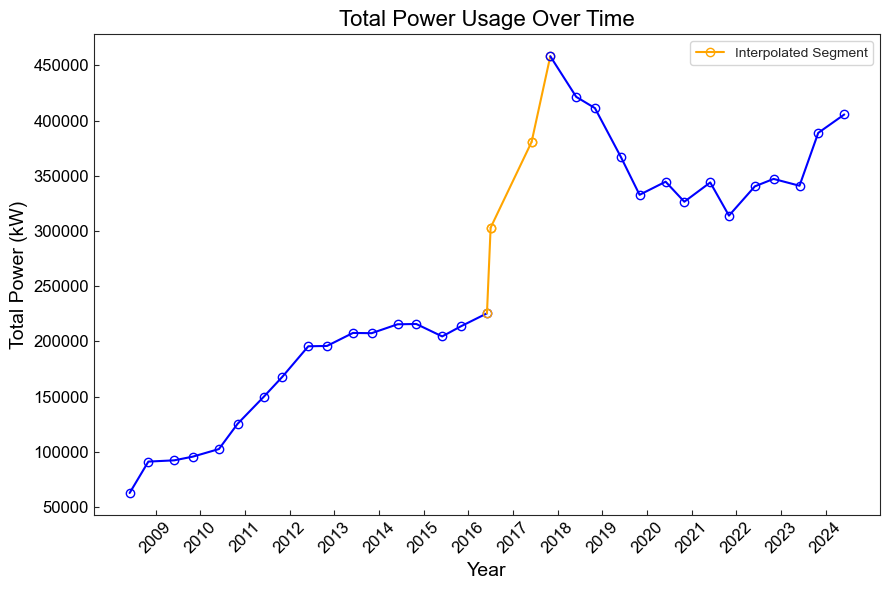

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total power values
dates = []
total_power_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values
        if power_column in data.columns:
            total_power = data[power_column].sum()
            dates.append(date)
            total_power_values.append(total_power)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Split data into two segments: before and after the gap
first_segment_dates = dates[dates < '2016-07']
first_segment_values = total_power_values[:len(first_segment_dates)]

second_segment_dates = dates[dates > '2017-06']
second_segment_values = total_power_values[len(first_segment_dates):]

# Calculate linear interpolation values for the two missing points
date_before_gap = pd.to_datetime('2016-06')
date_after_gap = pd.to_datetime('2017-11')

# Values for interpolation
value_before_gap = first_segment_values[-1]
value_after_gap = second_segment_values[0]

# Linear interpolation for two missing points (July 2016 and June 2017)
interpolated_date_1 = pd.to_datetime('2016-07')
interpolated_date_2 = pd.to_datetime('2017-06')
interpolated_value_1 = value_before_gap + (value_after_gap - value_before_gap) / 3
interpolated_value_2 = value_before_gap + 2 * (value_after_gap - value_before_gap) / 3

# Plot the data with unfilled circles as markers
plt.figure(figsize=(9, 6))

# Plot first segment (before gap) up to the last real point in blue
plt.plot(first_segment_dates, first_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Plot the connection from the last real point to the first interpolated point in orange
plt.plot([first_segment_dates[-1], interpolated_date_1], [value_before_gap, interpolated_value_1], linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange')

# Plot the interpolated points and the line between them in orange
plt.plot([interpolated_date_1, interpolated_date_2], [interpolated_value_1, interpolated_value_2], linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange', label='Interpolated Segment')

# Plot the connection from the second interpolated point to the first real point after the gap in orange
plt.plot([interpolated_date_2, second_segment_dates[0]], [interpolated_value_2, value_after_gap], linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange')

# Plot the second segment (after gap) starting from the first real point after the gap in blue
plt.plot(second_segment_dates, second_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Formatting the plot
plt.title('Total Power Usage Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Power (kW)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend to identify the interpolated segment
plt.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig('totalPower.png')
plt.show()


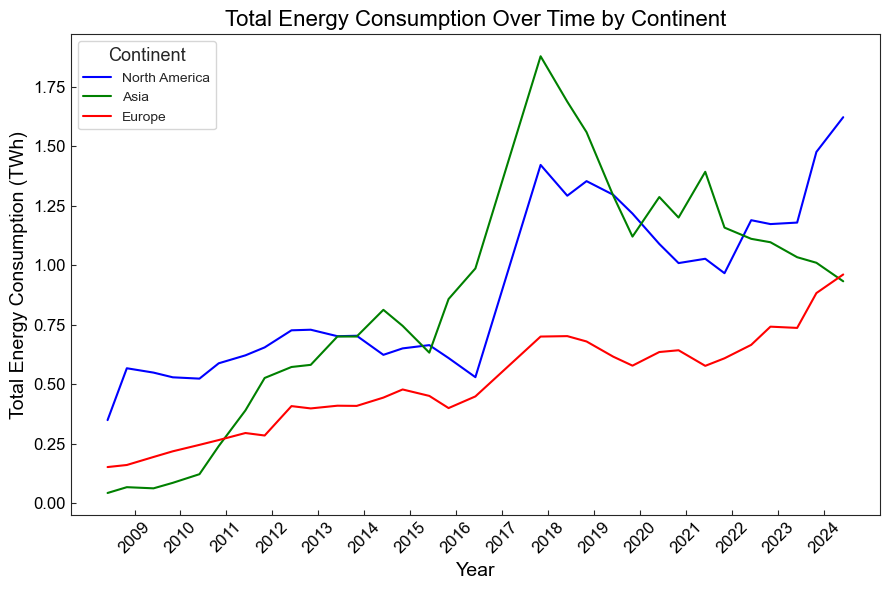

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {'dates': [], 'total_energy': []}
                data_by_continent[continent]['dates'].append(pd.Timestamp(year, int(month), 1))
                data_by_continent[continent]['total_energy'].append(total_energy)

# Plotting
plt.figure(figsize=(9, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents
for idx, (continent, data) in enumerate(data_by_continent.items()):
    plt.plot(data['dates'], data['total_energy'], linestyle='-', color=colors[idx % len(colors)], label=continent)

plt.title('Total Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=14, color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set x-axis to show every year
all_dates = [date for data in data_by_continent.values() for date in data['dates']]
plt.xticks(pd.date_range(start=min(all_dates), end=max(all_dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add grid lines and legend
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergyByContinent_TWh.png')
plt.show()


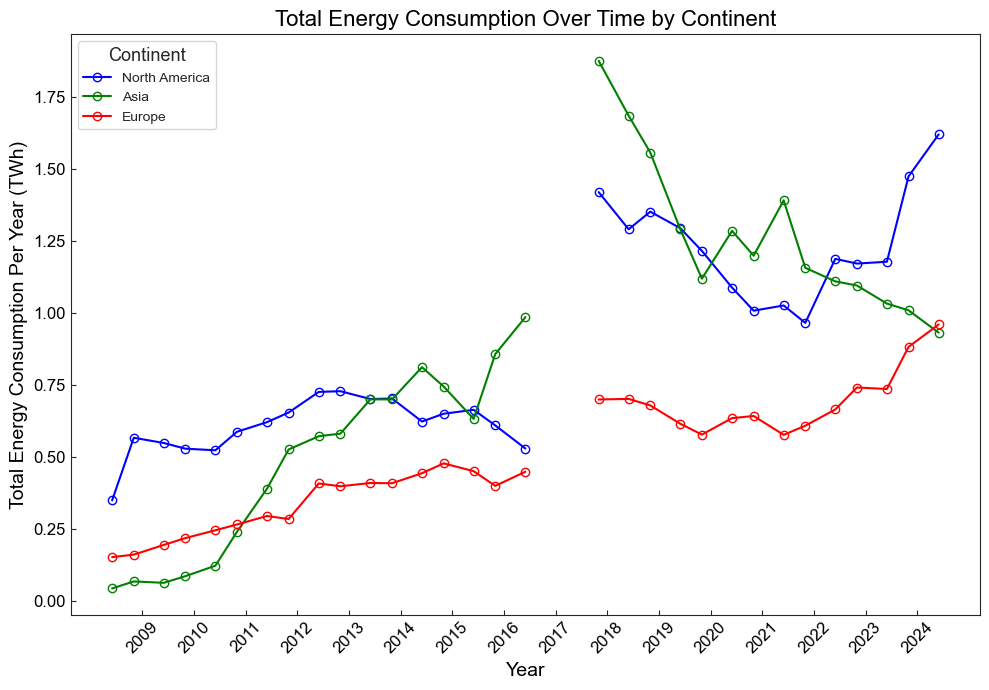

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {'dates': [], 'total_energy': []}
                data_by_continent[continent]['dates'].append(pd.Timestamp(year, int(month), 1))
                data_by_continent[continent]['total_energy'].append(total_energy)

# Plotting
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents

for idx, (continent, data) in enumerate(data_by_continent.items()):
    # Convert dates and energy values to a DataFrame for easier manipulation
    df = pd.DataFrame({'dates': data['dates'], 'total_energy': data['total_energy']})
    
    # Split data into two segments: before and after the gap (June 2016 and November 2017)
    first_segment = df[df['dates'] < '2016-07']
    second_segment = df[df['dates'] > '2017-06']
    
    # Plot each segment separately with unfilled circles and add label only for the first segment
    plt.plot(
        first_segment['dates'], first_segment['total_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o',
        markerfacecolor='none', markeredgecolor=colors[idx % len(colors)], label=continent
    )
    plt.plot(
        second_segment['dates'], second_segment['total_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o',
        markerfacecolor='none', markeredgecolor=colors[idx % len(colors)]
    )

# Formatting the plot
plt.title('Total Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption Per Year (TWh)', fontsize=14, color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set x-axis to show every year
all_dates = [date for data in data_by_continent.values() for date in data['dates']]
plt.xticks(pd.date_range(start=min(all_dates), end=max(all_dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend for the continents
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergyByContinent_TWhGAP.png')
plt.show()


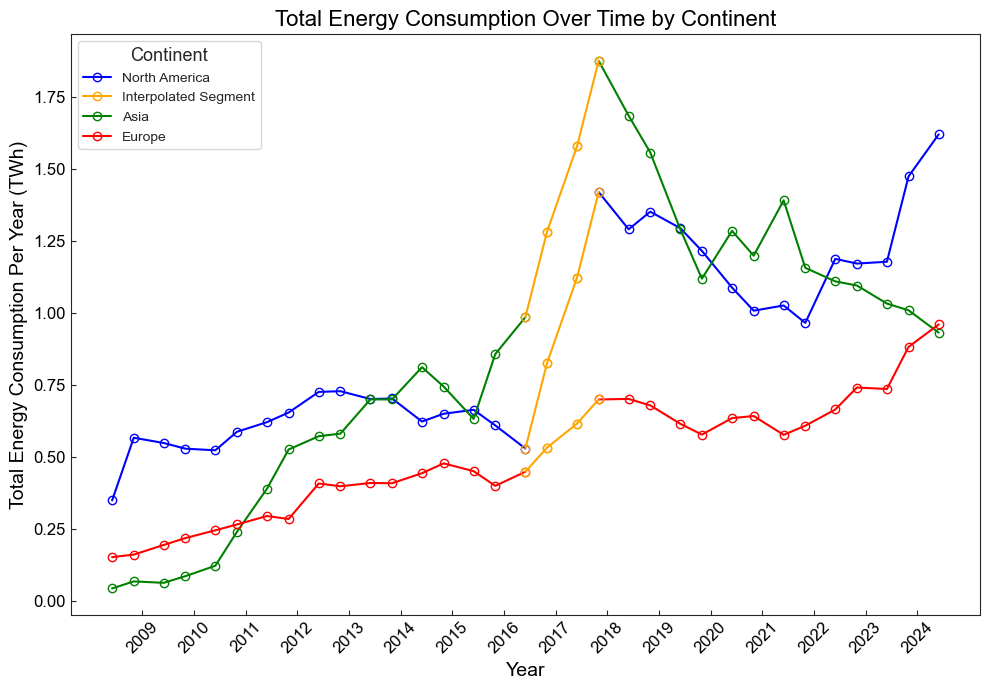

{'North America': {'dates': [Timestamp('2008-06-01 00:00:00'),
   Timestamp('2008-11-01 00:00:00'),
   Timestamp('2009-06-01 00:00:00'),
   Timestamp('2009-11-01 00:00:00'),
   Timestamp('2010-06-01 00:00:00'),
   Timestamp('2010-11-01 00:00:00'),
   Timestamp('2011-06-01 00:00:00'),
   Timestamp('2011-11-01 00:00:00'),
   Timestamp('2012-06-01 00:00:00'),
   Timestamp('2012-11-01 00:00:00'),
   Timestamp('2013-06-01 00:00:00'),
   Timestamp('2013-11-01 00:00:00'),
   Timestamp('2014-06-01 00:00:00'),
   Timestamp('2014-11-01 00:00:00'),
   Timestamp('2015-06-01 00:00:00'),
   Timestamp('2015-11-01 00:00:00'),
   Timestamp('2016-06-01 00:00:00'),
   Timestamp('2017-11-01 00:00:00'),
   Timestamp('2018-06-01 00:00:00'),
   Timestamp('2018-11-01 00:00:00'),
   Timestamp('2019-06-01 00:00:00'),
   Timestamp('2019-11-01 00:00:00'),
   Timestamp('2020-06-01 00:00:00'),
   Timestamp('2020-11-01 00:00:00'),
   Timestamp('2021-06-01 00:00:00'),
   Timestamp('2021-11-01 00:00:00'),
   Timestamp

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {'dates': [], 'total_energy': []}
                data_by_continent[continent]['dates'].append(pd.Timestamp(year, int(month), 1))
                data_by_continent[continent]['total_energy'].append(total_energy)

# Plotting
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents

for idx, (continent, data) in enumerate(data_by_continent.items()):
    # Convert dates and energy values to a DataFrame for easier manipulation
    df = pd.DataFrame({'dates': data['dates'], 'total_energy': data['total_energy']})
    
    # Split data into two segments: before and after the gap (June 2016 and November 2017)
    first_segment = df[df['dates'] < '2016-07']
    second_segment = df[df['dates'] > '2017-06']
    
    # Plot each segment separately with unfilled circles and add label only for the first segment
    plt.plot(
        first_segment['dates'], first_segment['total_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o',
        markerfacecolor='none', markeredgecolor=colors[idx % len(colors)], label=continent
    )
    plt.plot(
        second_segment['dates'], second_segment['total_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o',
        markerfacecolor='none', markeredgecolor=colors[idx % len(colors)]
    )
    
    # Calculate and plot interpolated points for November 2016 and June 2017
    if '2016-06-01' in first_segment['dates'].astype(str).values and '2017-11-01' in second_segment['dates'].astype(str).values:
        june_2016_value = first_segment[first_segment['dates'] == '2016-06-01']['total_energy'].values[0]
        november_2017_value = second_segment[second_segment['dates'] == '2017-11-01']['total_energy'].values[0]
        
        # Calculate interpolated values
        november_2016_value = june_2016_value + (november_2017_value - june_2016_value) / 3
        june_2017_value = june_2016_value + 2 * (november_2017_value - june_2016_value) / 3
        
        # Dates for interpolated points
        november_2016_date = pd.Timestamp('2016-11-01')
        june_2017_date = pd.Timestamp('2017-06-01')
        
        # Plot interpolated points and connecting lines in orange
        plt.plot(
            [first_segment['dates'].max(), november_2016_date], [june_2016_value, november_2016_value],
            linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange'
        )
        plt.plot(
            [november_2016_date, june_2017_date], [november_2016_value, june_2017_value],
            linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange', label='Interpolated Segment' if idx == 0 else ""
        )
        plt.plot(
            [june_2017_date, second_segment['dates'].min()], [june_2017_value, november_2017_value],
            linestyle='-', color='orange', marker='o', markerfacecolor='none', markeredgecolor='orange'
        )

# Formatting the plot
plt.title('Total Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption Per Year (TWh)', fontsize=14, color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Set x-axis to show every year
all_dates = [date for data in data_by_continent.values() for date in data['dates']]
plt.xticks(pd.date_range(start=min(all_dates), end=max(all_dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend for the continents
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergyByContinent_TWh_interpolated.png')
plt.show()
data_by_continent 

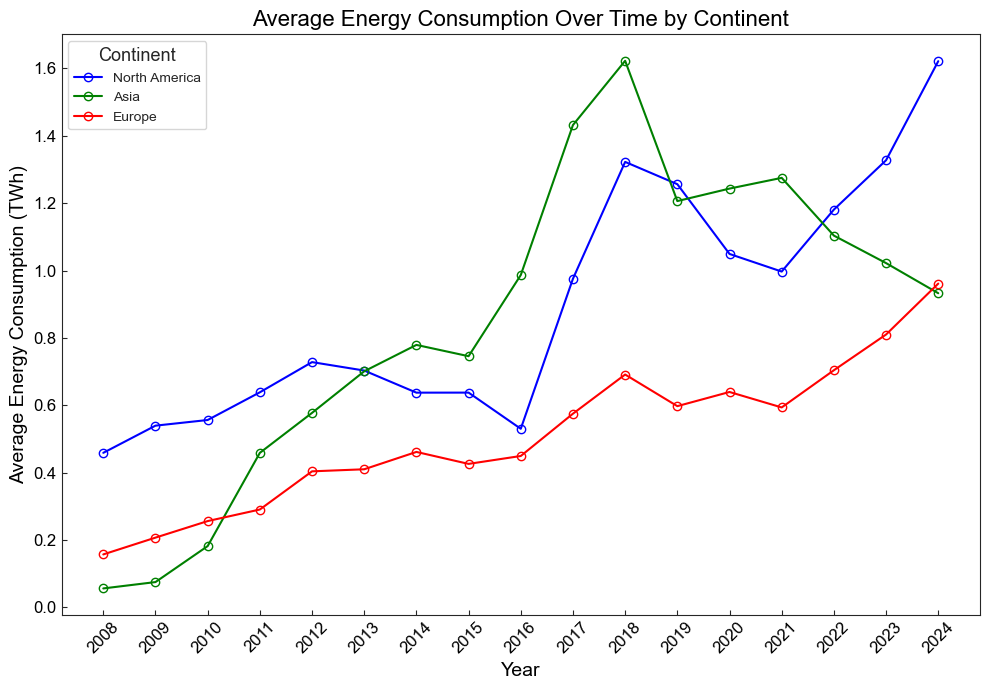

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Dictionary to store total energy values by year and continent
data_by_continent = {}

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = int(year_month[:4])
        month = year_month[4:]
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if year > 2016 or (year == 2016 and int(month) > 11) else "Power"
        
        # Group by continent and sum power values for each continent
        if power_column in data.columns:
            continent_power = data.groupby('Continent')[power_column].sum()
            
            # Add data to the dictionary
            for continent, total_power in continent_power.items():
                # Skip "South America", "Oceania", and "Africa"
                if continent in ["South America", "Oceania", "Africa"]:
                    continue
                # Combine "Americas" with "North America"
                if continent == "Americas":
                    continent = "North America"
                
                # Convert power to energy (TWh)
                total_energy = (total_power * 8760) / 1e9  # Convert to TWh
                
                if continent not in data_by_continent:
                    data_by_continent[continent] = {}
                if year not in data_by_continent[continent]:
                    data_by_continent[continent][year] = {}
                data_by_continent[continent][year][month] = total_energy

# Add interpolated points and calculate yearly averages
average_energy_by_year = {}
for continent, years in data_by_continent.items():
    average_energy_by_year[continent] = {'years': [], 'average_energy': []}
    for year, months in sorted(years.items()):
        # Use existing June and November data if available
        if '06' in months and '11' in months:
            june_value = months['06']
            november_value = months['11']
            avg_energy = (june_value + november_value) / 2
        elif year == 2016 and '06' in months:
            june_value = months['06']
            november_value = june_value + (months['06'] - june_value) / 3  # interpolated
            avg_energy = (june_value + november_value) / 2
        elif year == 2017 and '11' in months:
            november_value = months['11']
            june_value = june_value + 2 * (months['11'] - november_value) / 3  # interpolated
            avg_energy = (june_value + november_value) / 2
        elif year == 2024 and '06' in months:
            # For 2024, use only the June value directly
            avg_energy = months['06']
        else:
            continue  # Skip years without required data

        # Store the values in arrays for each continent
        average_energy_by_year[continent]['years'].append(year)
        average_energy_by_year[continent]['average_energy'].append(avg_energy)

# Plotting yearly averages
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Define a color palette for continents

for idx, (continent, data) in enumerate(average_energy_by_year.items()):
    plt.plot(
        data['years'], data['average_energy'],
        linestyle='-', color=colors[idx % len(colors)], marker='o', markerfacecolor='none',
        markeredgecolor=colors[idx % len(colors)], label=continent
    )

# Formatting the plot
plt.title('Average Energy Consumption Over Time by Continent', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Average Energy Consumption (TWh)', fontsize=14, color='black')
plt.xticks(data['years'], rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Add a legend for the continents
plt.legend(title="Continent", fontsize=10, title_fontsize='13', loc='upper left')

# Save and show the plot
plt.tight_layout()
plt.savefig('averageEnergyByYear_with_interpolated_2024.png')
plt.show()


Continent: North America
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.4586058852, 0.5393248613999999, 0.5560979400000001, 0.6383398422, 0.7279990554, 0.702946638, 0.6373140024, 0.637445052, 0.5300247636000001, 1.1240735348, 1.3224653574, 1.2562903464, 1.0491831852, 0.996836535, 1.1809151454000002, 1.327359438, 1.6215505476]

Continent: Asia
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.055994139, 0.0748657194, 0.18172300260000002, 0.458557311, 0.5772644651999999, 0.7007148965999999, 0.7790803674, 0.7455511608000001, 0.9865316652, 1.5804071052, 1.6226561034000002, 1.2061535814, 1.2432433338, 1.275114141, 1.1036630268, 1.0220019564, 0.9325578012]

Continent: Europe
Years: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Average Energy: [0.1569792438, 0.206864553, 0.25595

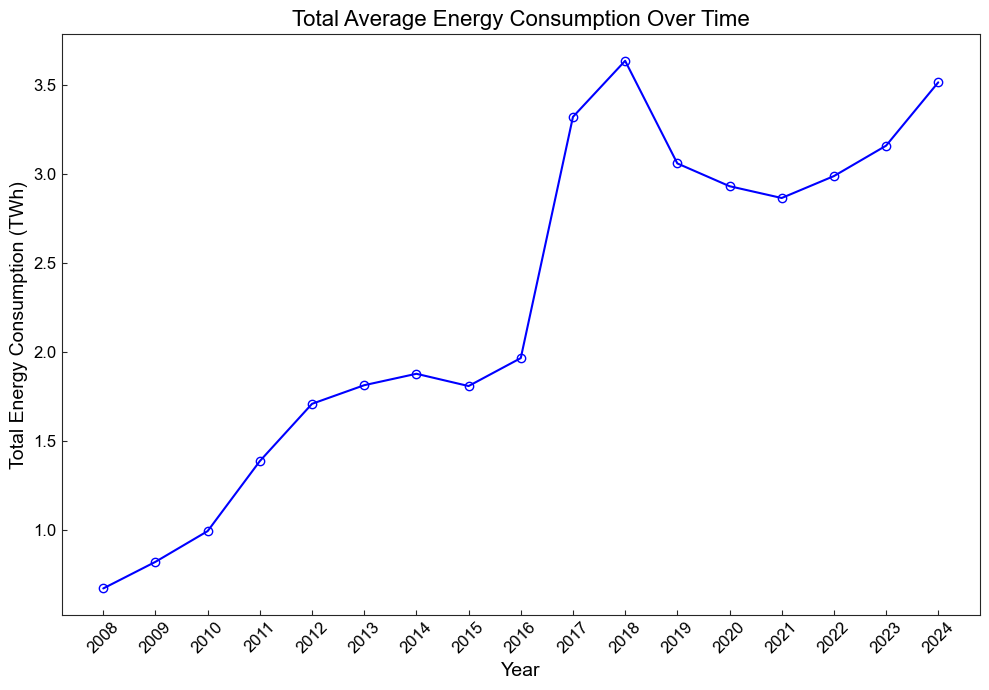

{2008: 0.6715792679999999,
 2009: 0.8210551337999998,
 2010: 0.9937807404000002,
 2011: 1.3872098166,
 2012: 1.7089403075999998,
 2013: 1.8134776799999999,
 2014: 1.8777081461999998,
 2015: 1.8088013292000003,
 2016: 1.9658159196,
 2017: 3.3212527052,
 2018: 3.636255633,
 2019: 3.0596863175999998,
 2020: 2.9317345602000002,
 2021: 2.8653569304,
 2022: 2.9884500414,
 2023: 3.159339333,
 2024: 3.5152506432}

In [11]:
continent_averages = {}

# Calculate yearly averages, including interpolated points
for continent, years in data_by_continent.items():
    continent_averages[continent] = {'years': [], 'average_energy': []}
    for year, months in sorted(years.items()):
        # Use existing June and November data if available
        if '06' in months and '11' in months:
            june_value = months['06']
            november_value = months['11']
            avg_energy = (june_value + november_value) / 2
        elif year == 2016 and '06' in months:
            # Interpolated November 2016 value
            june_value = months['06']
            november_value = june_value + (months.get('11', june_value) - june_value) / 3
            avg_energy = (june_value + november_value) / 2
        elif year == 2017 and '11' in months:
            # Interpolated June 2017 value
            november_value = months['11']
            june_value = november_value + 2 * (june_value - november_value) / 3
            avg_energy = (june_value + november_value) / 2
        elif year == 2024 and '06' in months:
            # For 2024, use only the June value directly
            avg_energy = months['06']
        else:
            continue  # skip years without required data

        # Store the values in arrays for each continent
        continent_averages[continent]['years'].append(year)
        continent_averages[continent]['average_energy'].append(avg_energy)

# Print the arrays for verification
for continent, data in continent_averages.items():
    print(f"Continent: {continent}")
    print("Years:", data['years'])
    print("Average Energy:", data['average_energy'])
    print()

# Summing the total average energy consumption across all continents
total_average_energy = {}
for continent, data in continent_averages.items():
    for year, avg_energy in zip(data['years'], data['average_energy']):
        if year not in total_average_energy:
            total_average_energy[year] = 0
        total_average_energy[year] += avg_energy  # Sum energy across continents for each year

# Sort the data by year
years = sorted(total_average_energy.keys())
total_energy_values = [total_average_energy[year] for year in years]

# Plotting total average energy consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(
    years, total_energy_values,
    linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b'
)
plt.title('Total Average Energy Consumption Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption (TWh)', fontsize=14, color='black')
plt.xticks(years, rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalAverageEnergyConsumption_with_2024.png')
plt.show()
total_average_energy

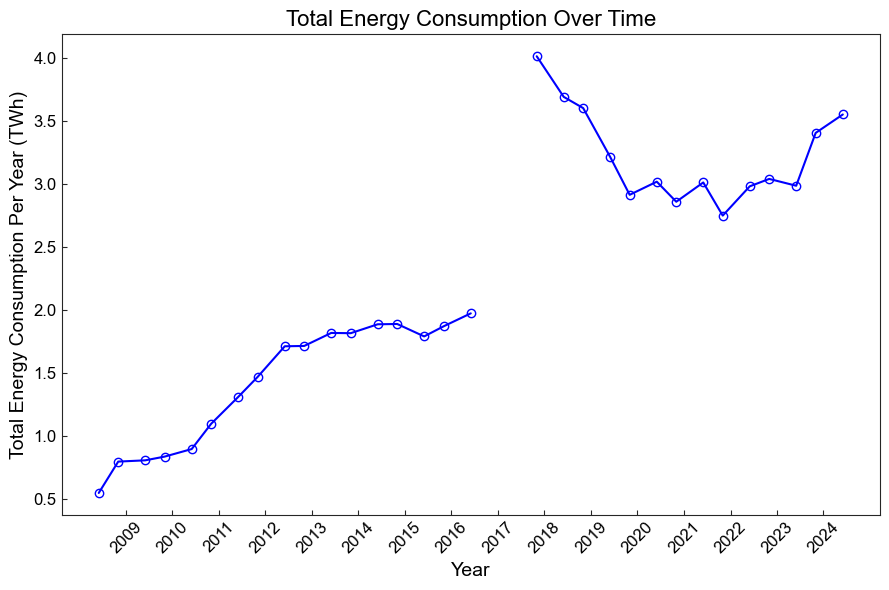

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Set Seaborn style for a clean background
sns.set_style("white")

# Initialize lists to store dates and total energy values
dates = []
total_energy_values = []

# Loop through each file in the current directory
for filename in os.listdir('.'):
    # Exclude specific files
    if filename in ['TOP500_201611.xls', 'TOP500_201706.xls']:
        continue
    
    # Check if the file matches the expected format and is an Excel file
    if re.match(r'TOP500_\d{6}\.xls[x]?', filename):
        # Extract the date from the filename (format: TOP500_YYYYMM)
        year_month = filename[7:13]
        year = year_month[:4]
        month = year_month[4:]
        date = f"{year}-{month}"
        
        # Load the Excel file
        data = pd.read_excel(filename)
        
        # Determine the correct column name for power
        power_column = "Power (kW)" if int(year) > 2016 or (int(year) == 2016 and int(month) > 11) else "Power"
        
        # Sum the power values and convert to energy (TWh)
        if power_column in data.columns:
            total_power = data[power_column].sum()
            total_energy = (total_power * 8760) / 1e9  # Convert to TWh
            dates.append(date)
            total_energy_values.append(total_energy)

# Convert dates to datetime format for plotting
dates = pd.to_datetime(dates, format='%Y-%m')

# Split data into two segments: before and after the gap (June 2016 and November 2017)
first_segment_dates = dates[dates < '2016-07']
first_segment_values = total_energy_values[:len(first_segment_dates)]

second_segment_dates = dates[dates > '2017-06']
second_segment_values = total_energy_values[len(first_segment_dates):]

# Plot the data with unfilled circles as markers
plt.figure(figsize=(9, 6))

# Plot first segment (before the gap)
plt.plot(first_segment_dates, first_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Plot second segment (after the gap)
plt.plot(second_segment_dates, second_segment_values, linestyle='-', color='b', marker='o', markerfacecolor='none', markeredgecolor='b')

# Formatting the plot
plt.title('Total Energy Consumption Over Time', fontsize=16, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Total Energy Consumption Per Year (TWh)', fontsize=14, color='black')

# Set the x-axis to show every year with larger tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=min(dates), end=max(dates), freq='YS'), rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.gca().axes.tick_params(which='both', direction='in', left=True, right=False, top=False, bottom=True)
plt.gca().axes.tick_params(axis='x', labelsize=12)
plt.gca().axes.tick_params(axis='y', labelsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('totalEnergy_TWh.png')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


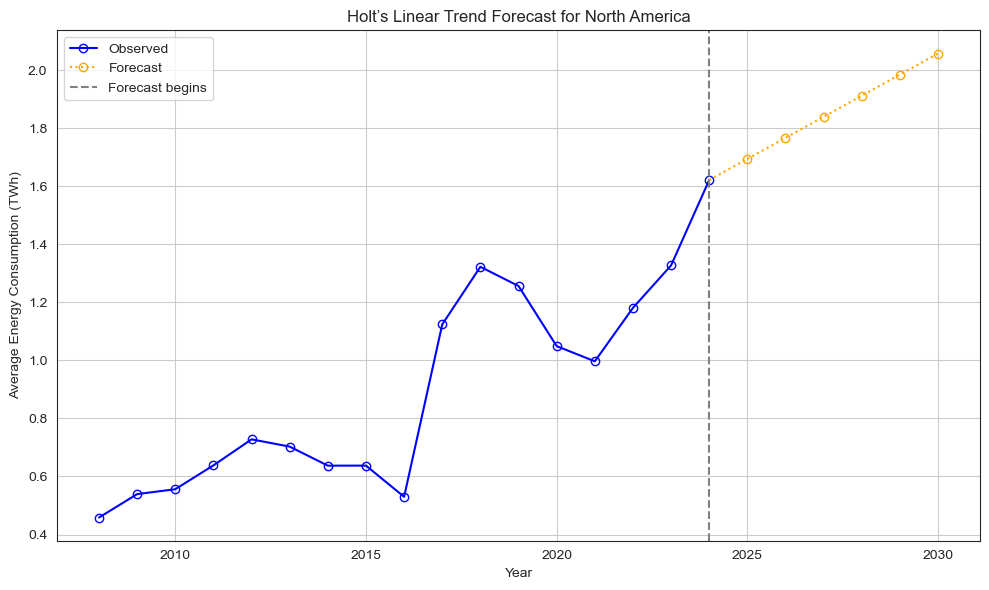

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


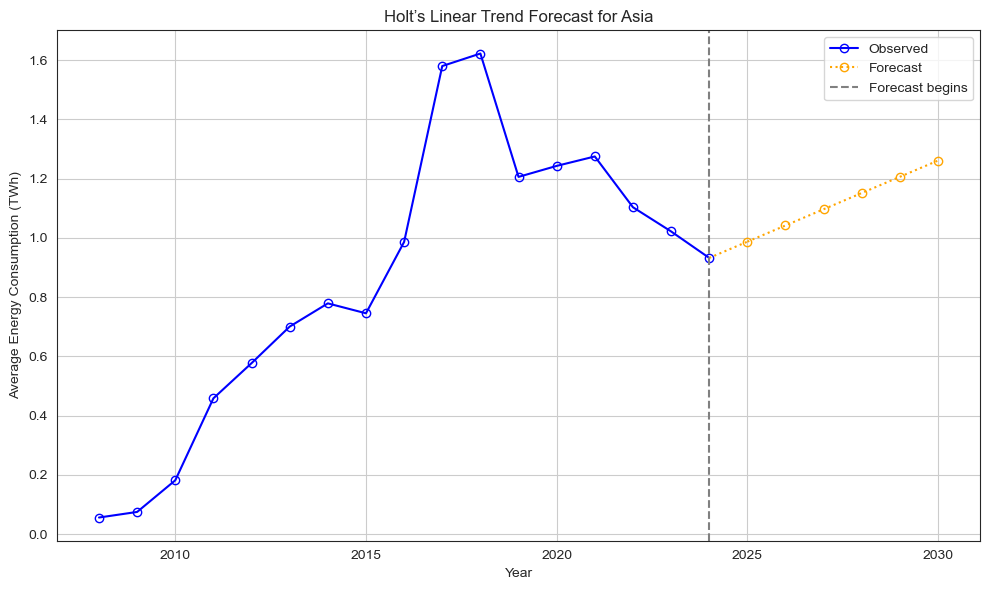

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


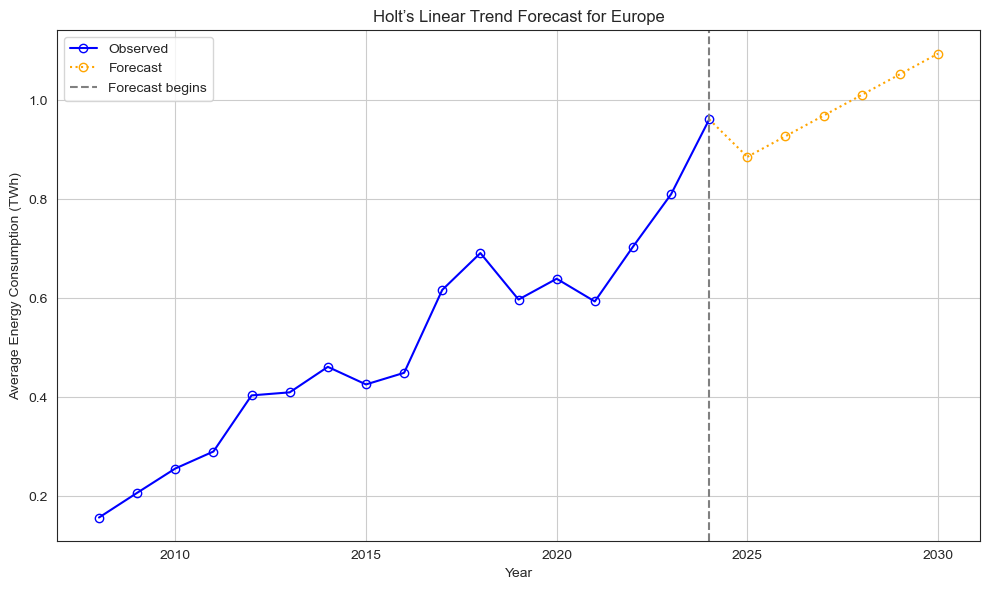

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example structure of continent_averages:
# continent_averages = {
#     'Asia': {'years': [2015, 2016, ...], 'average_energy': [20.5, 22.3, ...]},
#     'Europe': {'years': [2015, 2016, ...], 'average_energy': [18.0, 19.2, ...]},
#     ...
# }

# Forecasting for each continent using Holt’s Linear Trend Model
for continent, data in continent_averages.items():
    years = data['years']
    energy_values = data['average_energy']
    
    # Convert years and energy values to a DataFrame for easier handling
    df = pd.DataFrame({'Year': years, 'Energy': energy_values})
    df.set_index('Year', inplace=True)

    # Plot the observed data with unfilled circles
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Energy'], label='Observed', marker='o', linestyle='-', markerfacecolor='none', markeredgecolor='b', color='b')

    # Holt’s Linear Trend Model with automatic parameter optimization
    model = ExponentialSmoothing(df['Energy'], trend='add')
    fitted_model = model.fit()

    # Forecast for the next 6 years (to 2030)
    forecast_years = list(range(df.index[-1] + 1, df.index[-1] + 7))
    forecast = fitted_model.forecast(steps=6)

    # Plotting the forecasted values with a dotted line and unfilled circles
    plt.plot(forecast_years, forecast, label='Forecast', marker='o', linestyle=':', markerfacecolor='none', markeredgecolor='orange', color='orange')

    # Connect the last observed point to the first forecasted point
    plt.plot([df.index[-1], forecast_years[0]], [df['Energy'].iloc[-1], forecast.iloc[0]], color='orange', linestyle=':')

    # Dotted line indicating forecast period
    plt.axvline(x=df.index[-1], color='gray', linestyle='--', label='Forecast begins')

    # Formatting the plot
    plt.title(f'Holt’s Linear Trend Forecast for {continent}')
    plt.xlabel('Year')
    plt.ylabel('Average Energy Consumption (TWh)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("holts" + continent + ".png")
    plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Hyperparameters for North America:
{'smoothing_level': 0.9999999850988387, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.3858918100897778, 'initial_trend': 0.07262924861527599, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


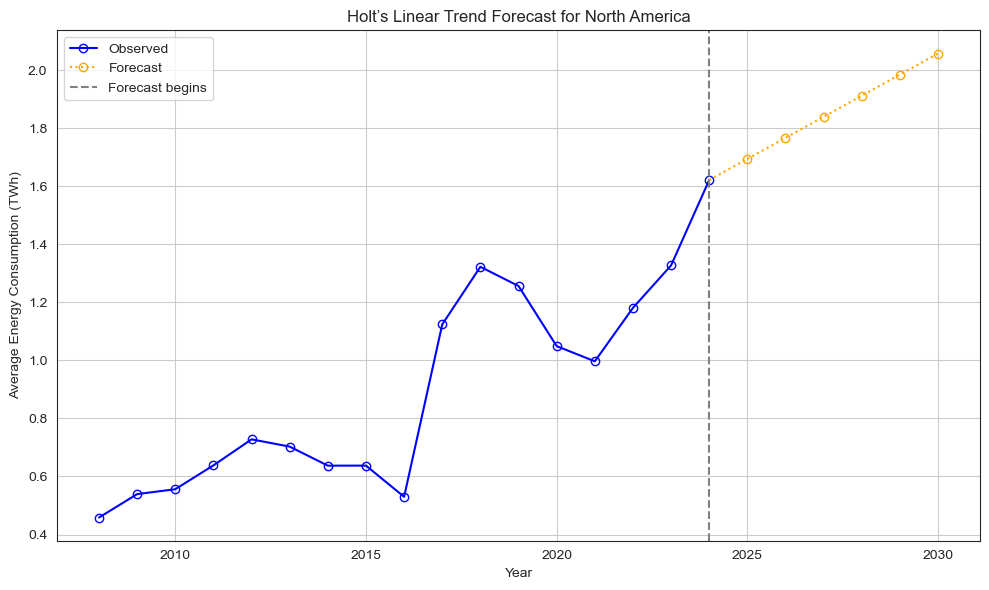

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Hyperparameters for Asia:
{'smoothing_level': 0.9999999850988386, 'smoothing_trend': 2.5430783881252293e-15, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.001208909686989456, 'initial_trend': 0.054785221697239365, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


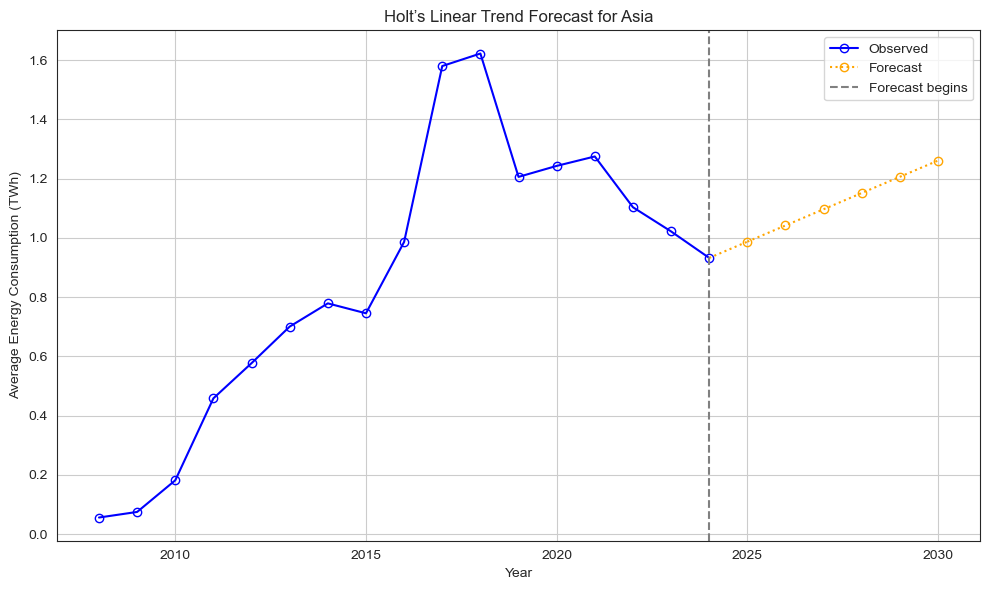

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Hyperparameters for Europe:
{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 2.979589624169722e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.13476061786201093, 'initial_trend': 0.04170665937287515, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


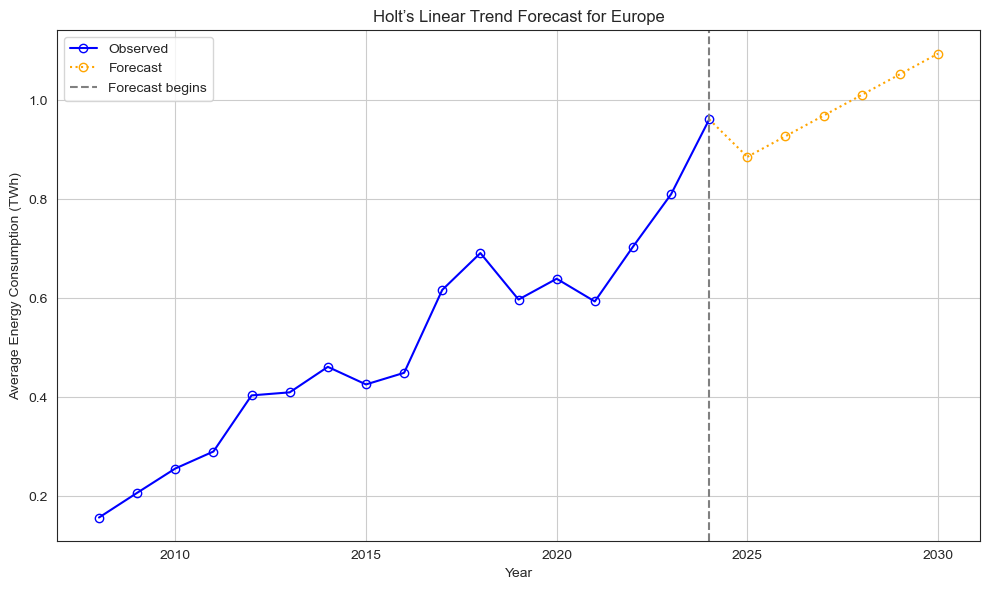

In [14]:
# Forecasting for each continent using Holt’s Linear Trend Model
for continent, data in continent_averages.items():
    years = data['years']
    energy_values = data['average_energy']
    
    # Convert years and energy values to a DataFrame for easier handling
    df = pd.DataFrame({'Year': years, 'Energy': energy_values})
    df.set_index('Year', inplace=True)

    # Plot the observed data with unfilled circles
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Energy'], label='Observed', marker='o', linestyle='-', markerfacecolor='none', markeredgecolor='b', color='b')

    # Holt’s Linear Trend Model with automatic parameter optimization
    model = ExponentialSmoothing(df['Energy'], trend='add')
    fitted_model = model.fit()

    # Print the chosen hyperparameters
    print(f"Hyperparameters for {continent}:")
    print(fitted_model.params)

    # Forecast for the next 6 years (to 2030)
    forecast_years = list(range(df.index[-1] + 1, df.index[-1] + 7))
    forecast = fitted_model.forecast(steps=6)

    # Plotting the forecasted values with a dotted line and unfilled circles
    plt.plot(forecast_years, forecast, label='Forecast', marker='o', linestyle=':', markerfacecolor='none', markeredgecolor='orange', color='orange')

    # Connect the last observed point to the first forecasted point
    plt.plot([df.index[-1], forecast_years[0]], [df['Energy'].iloc[-1], forecast.iloc[0]], color='orange', linestyle=':')

    # Dotted line indicating forecast period
    plt.axvline(x=df.index[-1], color='gray', linestyle='--', label='Forecast begins')

    # Formatting the plot
    plt.title(f'Holt’s Linear Trend Forecast for {continent}')
    plt.xlabel('Year')
    plt.ylabel('Average Energy Consumption (TWh)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("holts" + continent + ".png")
    plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df['Energy'], fitted_model.fittedvalues)
mse = mean_squared_error(df['Energy'], fitted_model.fittedvalues)
rmse = mse ** 0.5
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 0.04790973848641284, MSE: 0.003585255858851354, RMSE: 0.059877006094588216


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


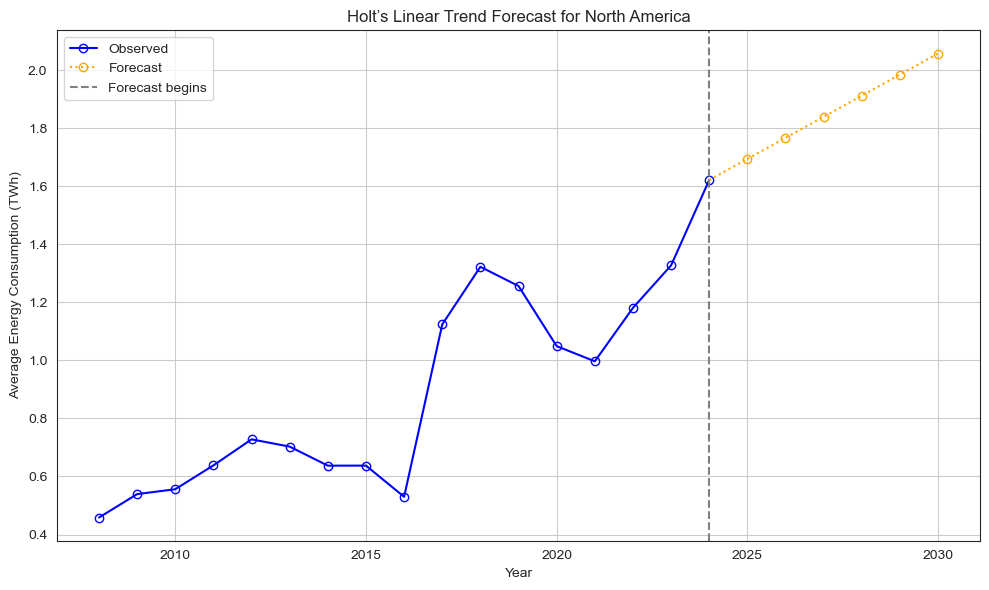

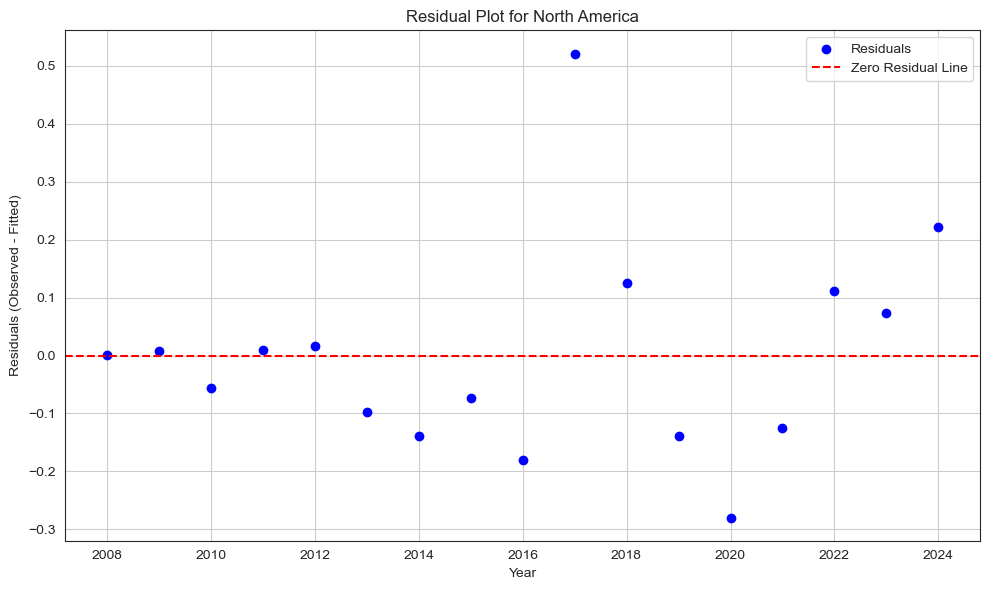

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


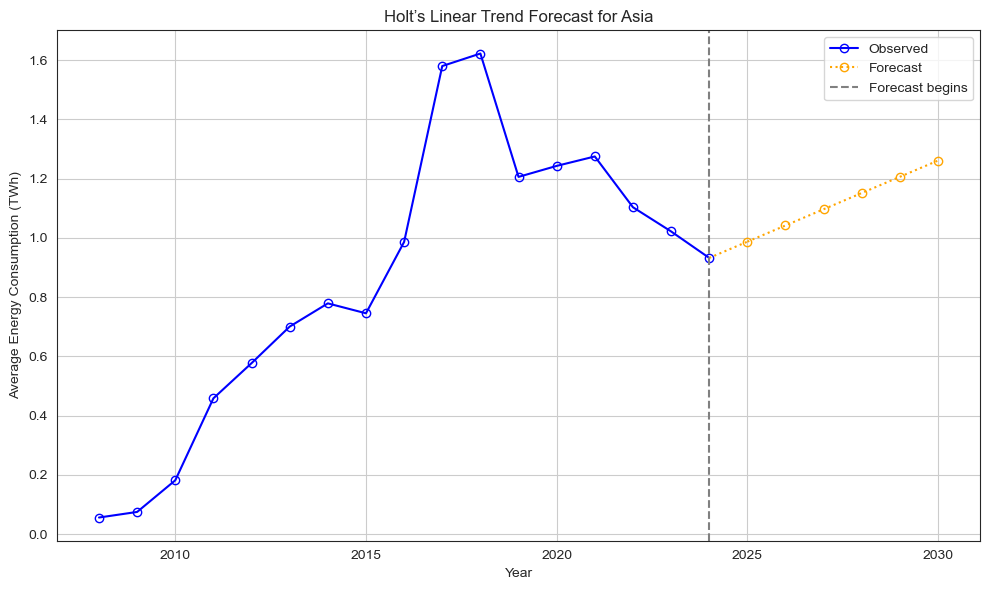

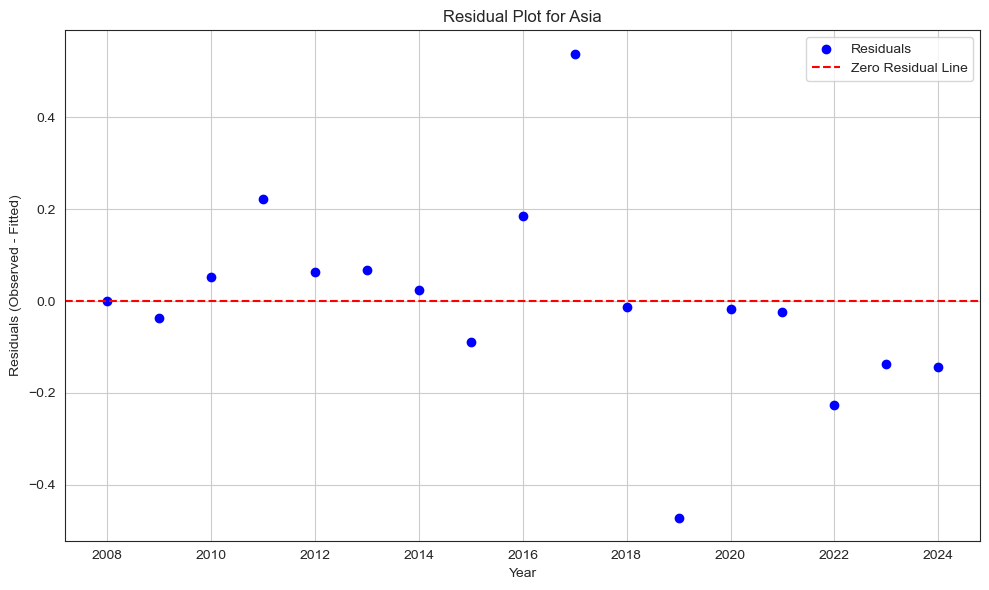

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


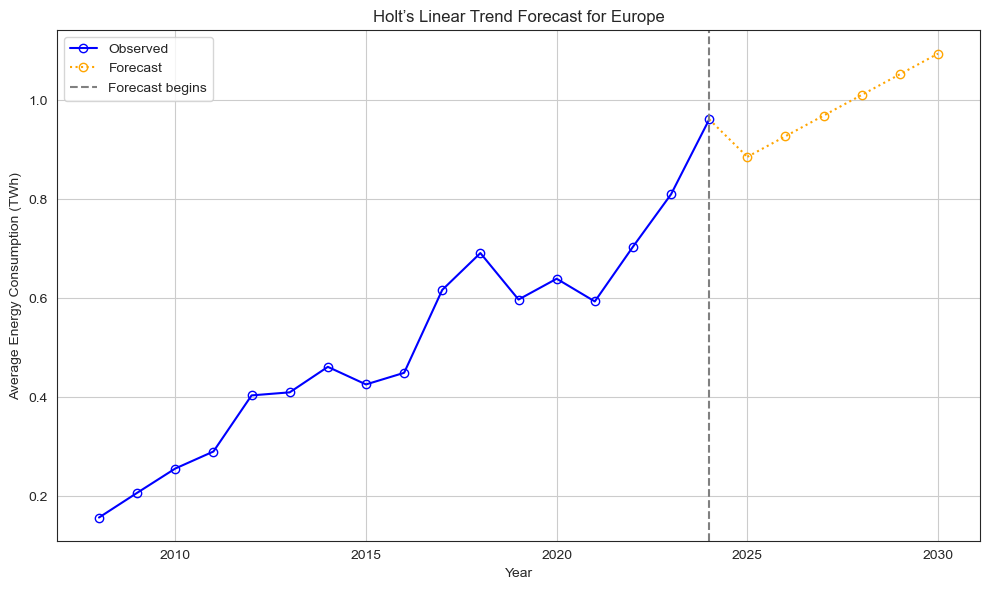

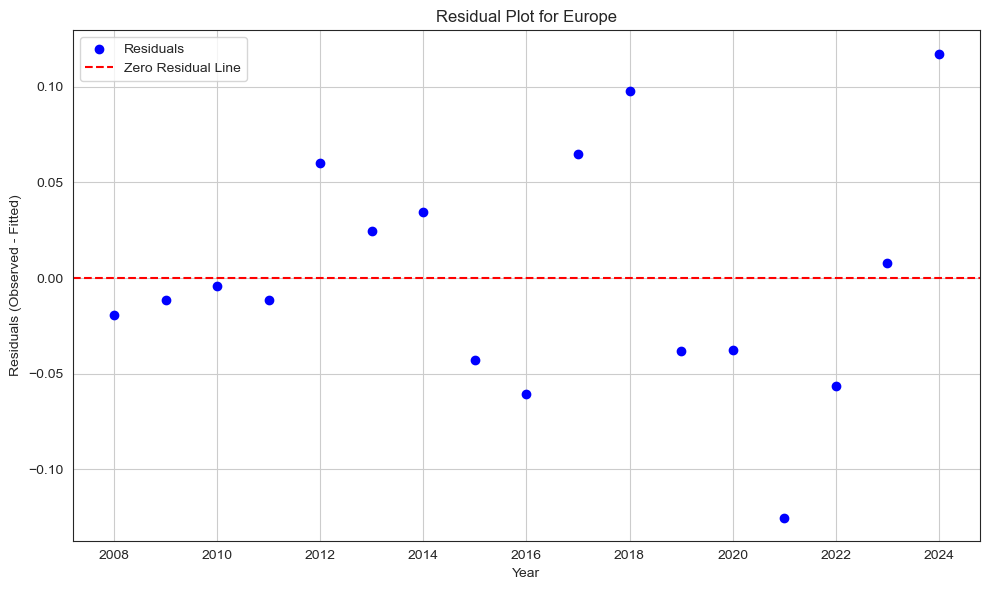

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example structure of continent_averages:
# continent_averages = {
#     'Asia': {'years': [2015, 2016, ...], 'average_energy': [20.5, 22.3, ...]},
#     'Europe': {'years': [2015, 2016, ...], 'average_energy': [18.0, 19.2, ...]},
#     ...
# }

# Forecasting for each continent using Holt’s Linear Trend Model
for continent, data in continent_averages.items():
    years = data['years']
    energy_values = data['average_energy']
    
    # Convert years and energy values to a DataFrame for easier handling
    df = pd.DataFrame({'Year': years, 'Energy': energy_values})
    df.set_index('Year', inplace=True)

    # Plot the observed data with unfilled circles
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Energy'], label='Observed', marker='o', linestyle='-', markerfacecolor='none', markeredgecolor='b', color='b')

    # Holt’s Linear Trend Model with automatic parameter optimization
    model = ExponentialSmoothing(df['Energy'], trend='add')
    fitted_model = model.fit()

    # Compute residuals (difference between observed and fitted values)
    residuals = df['Energy'] - fitted_model.fittedvalues

    # Forecast for the next 6 years (to 2030)
    forecast_years = list(range(df.index[-1] + 1, df.index[-1] + 7))
    forecast = fitted_model.forecast(steps=6)

    # Plotting the forecasted values with a dotted line and unfilled circles
    plt.plot(forecast_years, forecast, label='Forecast', marker='o', linestyle=':', markerfacecolor='none', markeredgecolor='orange', color='orange')

    # Connect the last observed point to the first forecasted point
    plt.plot([df.index[-1], forecast_years[0]], [df['Energy'].iloc[-1], forecast.iloc[0]], color='orange', linestyle=':')

    # Dotted line indicating forecast period
    plt.axvline(x=df.index[-1], color='gray', linestyle='--', label='Forecast begins')

    # Formatting the plot
    plt.title(f'Holt’s Linear Trend Forecast for {continent}')
    plt.xlabel('Year')
    plt.ylabel('Average Energy Consumption (TWh)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("holts" + continent + ".png")
    plt.show()

    # Residual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, residuals, color='blue', label='Residuals')
    plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
    plt.title(f'Residual Plot for {continent}')
    plt.xlabel('Year')
    plt.ylabel('Residuals (Observed - Fitted)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("residuals_" + continent + ".png")
    plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


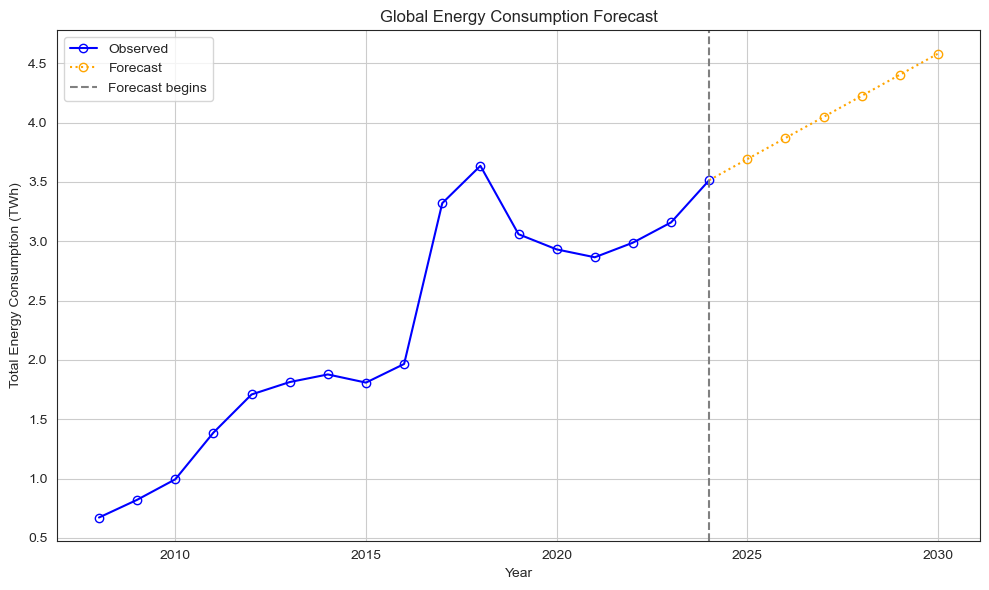

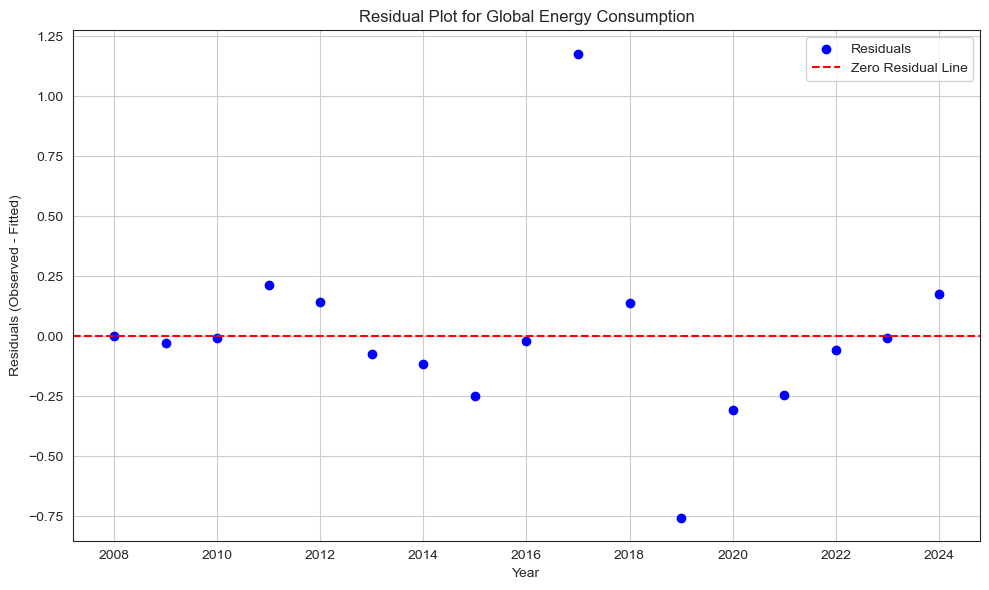

17    3.693060
18    3.870869
19    4.048678
20    4.226488
21    4.404297
22    4.582106
dtype: float64

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example structure of continent_averages:
# continent_averages = {
#     'Asia': {'years': [2015, 2016, ...], 'average_energy': [20.5, 22.3, ...]},
#     'Europe': {'years': [2015, 2016, ...], 'average_energy': [18.0, 19.2, ...]},
#     ...
# }

# Combine data from all continents
global_data = {'Year': [], 'Energy': []}

for continent, data in continent_averages.items():
    global_data['Year'].extend(data['years'])
    global_data['Energy'].extend(data['average_energy'])

# Convert to DataFrame
global_df = pd.DataFrame(global_data)
global_df = global_df.groupby('Year').sum().reset_index()  # Sum energy by year
global_df.set_index('Year', inplace=True)

# Plot the observed global data
plt.figure(figsize=(10, 6))
plt.plot(global_df.index, global_df['Energy'], label='Observed', marker='o', linestyle='-', markerfacecolor='none', markeredgecolor='b', color='b')

# Holt’s Linear Trend Model for global data
model = ExponentialSmoothing(global_df['Energy'], trend='add')
fitted_model = model.fit()

# Forecast for the next 6 years (to 2030)
forecast_years = list(range(global_df.index[-1] + 1, global_df.index[-1] + 7))
forecast = fitted_model.forecast(steps=6)

# Plot the forecasted values
plt.plot(forecast_years, forecast, label='Forecast', marker='o', linestyle=':', markerfacecolor='none', markeredgecolor='orange', color='orange')

# Connect the last observed point to the first forecasted point
plt.plot([global_df.index[-1], forecast_years[0]], [global_df['Energy'].iloc[-1], forecast.iloc[0]], color='orange', linestyle=':')

# Dotted line indicating forecast period
plt.axvline(x=global_df.index[-1], color='gray', linestyle='--', label='Forecast begins')

# Formatting the plot
plt.title("Global Energy Consumption Forecast")
plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (TWh)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("global_forecast.png")
plt.show()

# Residual Plot for Global Data
residuals = global_df['Energy'] - fitted_model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(global_df.index, residuals, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title("Residual Plot for Global Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Residuals (Observed - Fitted)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("global_residuals.png")
plt.show()
forecast

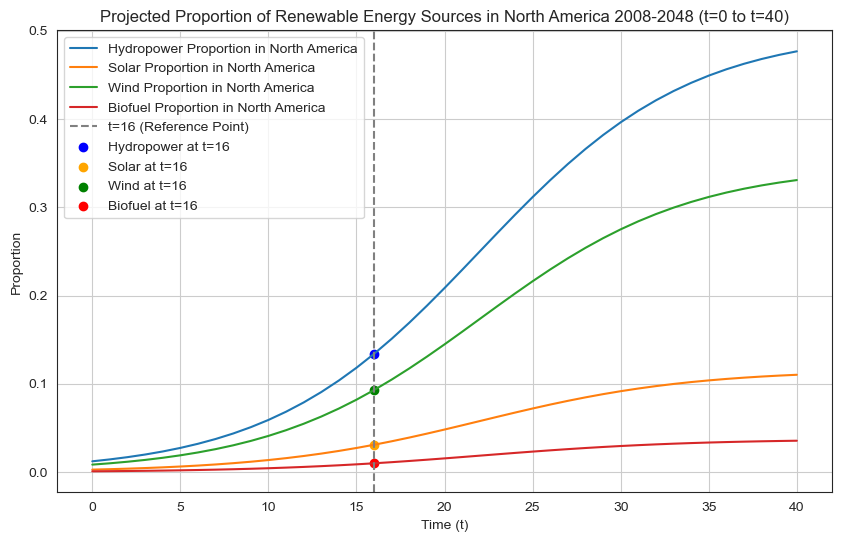

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Plotting the renewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in renewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions["Hydropower"], color='blue', label='Hydropower at t=16')
plt.scatter(16, initial_proportions["Solar"], color='orange', label='Solar at t=16')
plt.scatter(16, initial_proportions["Wind"], color='green', label='Wind at t=16')
plt.scatter(16, initial_proportions["Biofuel"], color='red', label='Biofuel at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Renewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("RenewableLogistic.png")
plt.show()



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate residuals for the global data
residuals = global_df['Energy'] - fitted_model.fittedvalues

# Compute error metrics
mae = mean_absolute_error(global_df['Energy'], fitted_model.fittedvalues)
mse = mean_squared_error(global_df['Energy'], fitted_model.fittedvalues)
rmse = mse ** 0.5

# Print error metrics
print("Error Metrics for Global Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
import numpy as np

# Observed and fitted values
observed = global_df['Energy']
fitted = fitted_model.fittedvalues

# Calculate SS_res and SS_tot
ss_res = np.sum((observed - fitted) ** 2)
ss_tot = np.sum((observed - np.mean(observed)) ** 2)

# Calculate R^2
r_squared = 1 - (ss_res / ss_tot)

# Print R^2 value
print(f"R-squared (R^2) for Global Data: {r_squared:.4f}")


Error Metrics for Global Data:
Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
R-squared (R^2) for Global Data: 0.8489


In [20]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example structure of continent_averages:
# continent_averages = {
#     'Asia': {'years': [2015, 2016, ...], 'average_energy': [20.5, 22.3, ...]},
#     'Europe': {'years': [2015, 2016, ...], 'average_energy': [18.0, 19.2, ...]},
#     ...
# }

# Dictionary to store forecasts for 2030
forecast_2030 = {}

# Forecasting for each continent using Holt’s Linear Trend Model
for continent, data in continent_averages.items():
    years = data['years']
    energy_values = data['average_energy']
    
    # Convert years and energy values to a DataFrame for easier handling
    df = pd.DataFrame({'Year': years, 'Energy': energy_values})
    df.set_index('Year', inplace=True)

    # Holt’s Linear Trend Model
    model = ExponentialSmoothing(df['Energy'], trend='add')
    fitted_model = model.fit()

    # Forecast for the year 2030
    forecast_steps = 2030 - df.index[-1]  # Number of years to forecast
    forecast = fitted_model.forecast(steps=forecast_steps)
    
    # Get the predicted value for 2030
    forecast_2030[continent] = forecast.iloc[-1]

# Print the energy consumption forecast for each continent in 2030
print("Energy Consumption Forecast for 2030 (TWh):")
for continent, value in forecast_2030.items():
    print(f"{continent}: {value:.2f} TWh")


Energy Consumption Forecast for 2030 (TWh):
North America: 2.06 TWh
Asia: 1.26 TWh
Europe: 1.09 TWh


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Val

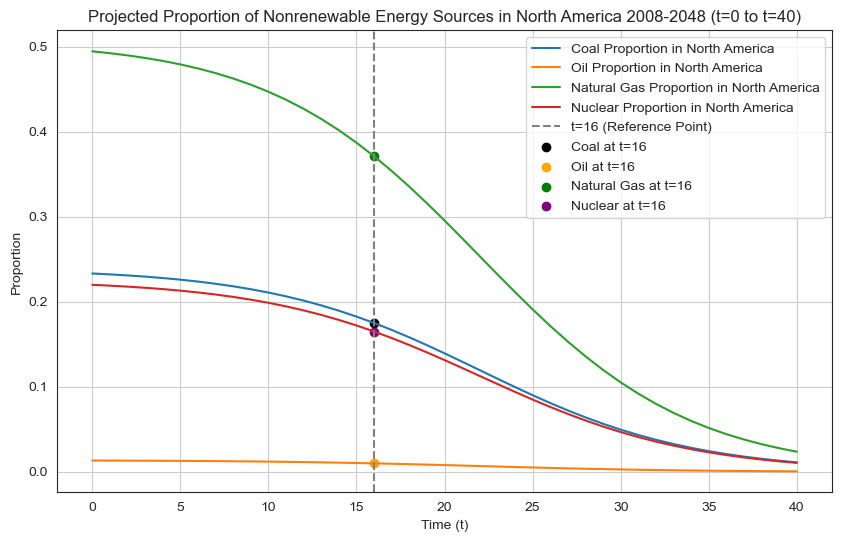

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the logistic function (for renewable sources)
L = 1.0  # Saturation level for the logistic function
k = 0.16746558  # Growth rate from the North America logistic model
t_inflection = 22  # Inflection point from the North America model

# Define the time period
t = np.arange(0, 41)  # From t=0 to t=40

# Logistic function for renewable energy proportion in North America
psi_NA = L / (1 + np.exp(-k * (t - t_inflection)))

# Initial proportions for each renewable at t=16
initial_proportions_renewable = {
    "Hydropower": 0.134,
    "Solar": 0.031,
    "Wind": 0.093,
    "Biofuel": 0.01
}

# Dictionary to store each renewable's proportion over time
renewable_proportions = {}

# Calculate the proportion over time for each renewable source
for source, initial_value in initial_proportions_renewable.items():
    # Initialize the proportion array for this renewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        proportions[time] = proportions[time - 1] * (psi_NA[time] / psi_NA[time - 1])

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        proportions[time] = proportions[time + 1] / (psi_NA[time + 1] / psi_NA[time])

    # Store the calculated proportions in the dictionary
    renewable_proportions[source] = proportions

# Initial proportions for each nonrenewable at t=16
initial_proportions_nonrenewable = {
    "Coal": 0.175,
    "Oil": 0.01,
    "Natural Gas": 0.371,
    "Nuclear": 0.165
}

# Dictionary to store each nonrenewable's proportion over time
nonrenewable_proportions = {}

# Calculate the proportion over time for each nonrenewable source
for source, initial_value in initial_proportions_nonrenewable.items():
    # Initialize the proportion array for this nonrenewable source
    proportions = np.zeros_like(t, dtype=float)
    proportions[16] = initial_value  # Set the known value at t=16

    # Forward recursion from t=17 to t=40
    for time in range(17, len(t)):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_prev = sum(renewable_proportions[renewable][time - 1] for renewable in renewable_proportions)
        
        nonrenewable_sum_prev = 1 - renewable_sum_prev  # Total nonrenewable at t-1

        # Apply the recursive formula
        proportions[time] = (1 - renewable_sum) / nonrenewable_sum_prev * proportions[time - 1]

    # Reverse recursion from t=15 down to t=0
    for time in range(15, -1, -1):
        renewable_sum = sum(renewable_proportions[renewable][time] for renewable in renewable_proportions)
        renewable_sum_next = sum(renewable_proportions[renewable][time + 1] for renewable in renewable_proportions)
        
        nonrenewable_sum = 1 - renewable_sum  # Total nonrenewable at t+1

        # Apply the reverse recursive formula
        proportions[time] = nonrenewable_sum / (1 - renewable_sum_next) * proportions[time + 1]

    # Store the calculated proportions in the dictionary
    nonrenewable_proportions[source] = proportions

# Plotting the nonrenewable proportions for each source in North America
plt.figure(figsize=(10, 6))

for source, proportions in nonrenewable_proportions.items():
    plt.plot(t, proportions, label=f'{source} Proportion in North America')

# Mark the known data points at t=16
plt.axvline(16, linestyle='--', color='gray', label='t=16 (Reference Point)')
plt.scatter(16, initial_proportions_nonrenewable["Coal"], color='black', label='Coal at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Oil"], color='orange', label='Oil at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Natural Gas"], color='green', label='Natural Gas at t=16')
plt.scatter(16, initial_proportions_nonrenewable["Nuclear"], color='purple', label='Nuclear at t=16')

# Add labels, title, and legend
plt.xlabel('Time (t)')
plt.ylabel('Proportion')
plt.title('Projected Proportion of Nonrenewable Energy Sources in North America 2008-2048 (t=0 to t=40)')
plt.legend()
plt.grid(True)
plt.savefig("NonrenewableLogistic.png")
plt.show()



Calculating emissions for Asia in 2024:
Total Energy (TWh): 1.6215505476 TWh
Converted Total Energy: 1621550547.6000001 kWh

Energy Source: Coal
 - Carbon Intensity: 1040 gCO2 per kWh
 - Proportion: 0.175
 - Emissions from Coal: 295122199.6632 kgCO2

Energy Source: Oil
 - Carbon Intensity: 1080 gCO2 per kWh
 - Proportion: 0.01
 - Emissions from Oil: 17512745.91408 kgCO2

Energy Source: Natural Gas
 - Carbon Intensity: 490 gCO2 per kWh
 - Proportion: 0.371
 - Emissions from Natural Gas: 294781674.048204 kgCO2

Energy Source: Nuclear
 - Carbon Intensity: 12 gCO2 per kWh
 - Proportion: 0.165
 - Emissions from Nuclear: 3210670.0842480003 kgCO2

Energy Source: Hydropower
 - Carbon Intensity: 24 gCO2 per kWh
 - Proportion: 0.134
 - Emissions from Hydropower: 5214906.5610816 kgCO2

Energy Source: Solar
 - Carbon Intensity: 48 gCO2 per kWh
 - Proportion: 0.031
 - Emissions from Solar: 2412867.2148288004 kgCO2

Energy Source: Wind
 - Carbon Intensity: 12 gCO2 per kWh
 - Proportion: 0.093
 - Em

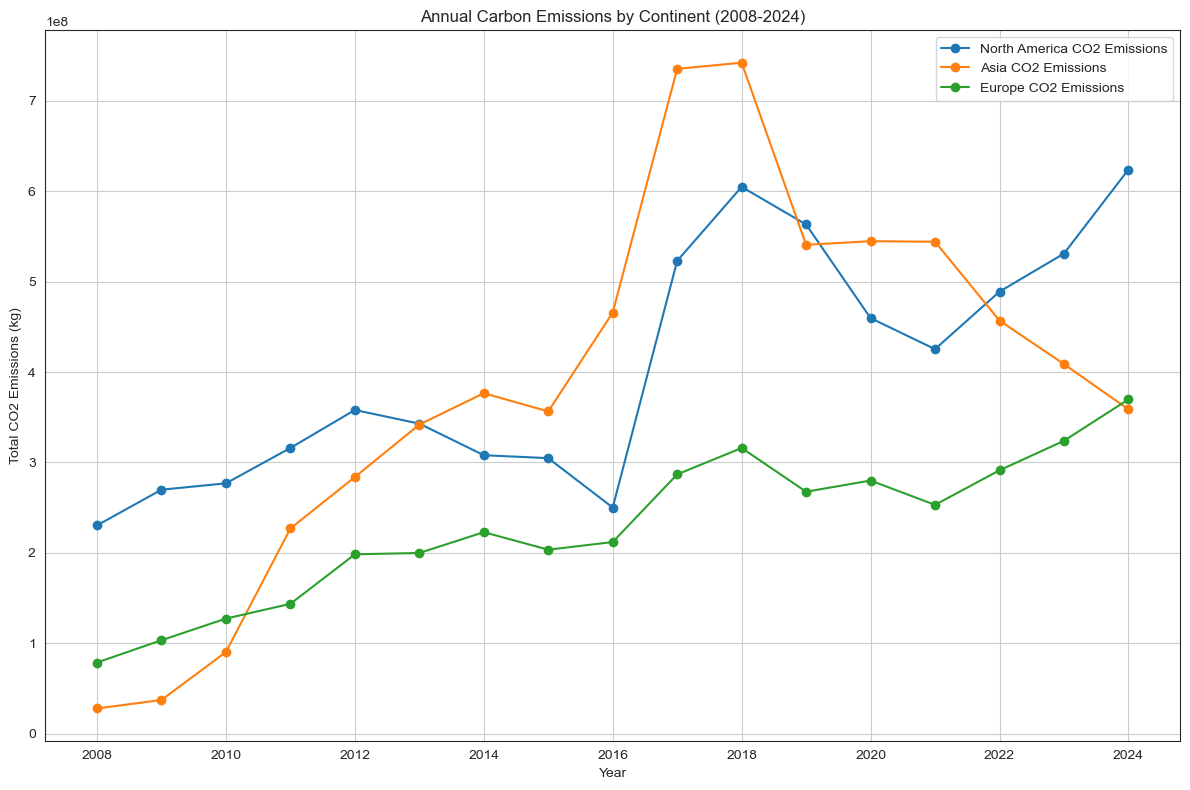

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Carbon intensity values (gCO2 per kWh) for each energy source
carbon_intensity = {
    "Coal": 1040,
    "Oil": 1080,
    "Natural Gas": 490,
    "Nuclear": 12,
    "Hydropower": 24,
    "Solar": 48,
    "Wind": 12,
    "Biofuel": 230
}

# Calculate annual carbon emissions for each continent from 2008 to 2024
years = np.arange(2008, 2025)  # From 2008 to 2024
annual_emissions = {continent: [] for continent in continent_averages}

for continent, data in continent_averages.items():
    energy_years = data['years']
    energy_values = data['average_energy']
    
    # Loop through each year from 2008 to 2024
    for year in years:
        if year in energy_years:
            # Get the total energy consumption for the current year in TWh and convert to kWh
            total_energy_kwh = energy_values[energy_years.index(year)] * 1e9  # Convert TWh to kWh

            # Initialize emissions for this year
            emissions = 0
            
            if continent == "North America" and year == 2024:
                print(f"\nCalculating emissions for Asia in {year}:")
                print(f"Total Energy (TWh): {energy_values[energy_years.index(year)]} TWh")
                print(f"Converted Total Energy: {total_energy_kwh} kWh")

            # Calculate emissions by summing contributions of each energy source
            for source, intensity in carbon_intensity.items():
                # Determine if the source is renewable or nonrenewable
                if source in renewable_proportions:
                    # Renewable source
                    proportion = renewable_proportions[source][year - 2008]
                elif source in nonrenewable_proportions:
                    # Nonrenewable source
                    proportion = nonrenewable_proportions[source][year - 2008]
                else:
                    continue  # Skip if source is not defined in proportions

                # Calculate emissions contribution of this source
                source_emission = total_energy_kwh * proportion * (intensity / 1000)  # Convert gCO2 to kgCO2
                emissions += source_emission
                
                # Print detailed calculations for Asia in 2024
                if continent == "North America" and year == 2024:
                    print(f"\nEnergy Source: {source}")
                    print(f" - Carbon Intensity: {intensity} gCO2 per kWh")
                    print(f" - Proportion: {proportion}")
                    print(f" - Emissions from {source}: {source_emission} kgCO2")

            # Store the calculated emissions for this year
            annual_emissions[continent].append(emissions)

            # Print total emissions for Asia in 2024
            if continent == "North America" and year == 2024:
                print(f"\nTotal Emissions for Asia in 2024: {emissions} kgCO2")

        else:
            # If data for the year is missing in `continent_averages`, add None or 0
            annual_emissions[continent].append(None)

# Plot annual carbon emissions from 2008 to 2024 for each continent
plt.figure(figsize=(12, 8))

for continent, emissions in annual_emissions.items():
    plt.plot(years, emissions, marker='o', label=f'{continent} CO2 Emissions')

# Formatting the plot
plt.title('Annual Carbon Emissions by Continent (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig("AnnualCarbonEmissions.png")
plt.show()
